# Data Preparation and Customer Analytics
# Task 1

Conduct analysis on client's transaction dataset and identify customer purchasing behaviours to generate insights and provide commercial recommendations.

## Work FLow

**1. Examine transaction data;** 

    - Look for inconsistencies
    - missing data across the dataset
    - outliers
    - correctly identify category items
    - numeric data across all tables.
    
    If anomalies are determined, make necessary changes and save it
    
**2. Examine customer data;**

    - Look for inconsistencies
    - missing data across the dataset
    - outliers
    - correctly identify category items
    - numeric data across all tables.

After completing the above tasks, merge the two datasets so it is ready for analysis.

**3. Data analysis and customer segments;**

    - define metrics
    - look at total sales
    - drivers of sales
    - where the highest sales are coming from
    - create charts and graphs
    - note interesting trends and insights
    
**4. Deep dive into customer segments;**

    - define recommendation from insights
    - determine which segments should be targeted
    - form overall conclusion based on analysis
    
**4. Save analysis**

    - save analysis and visuals

We will start this analysis by loading required libraries for analysis

In [36]:
# load libriaries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
# import data
transaction_df = pd.read_csv("../data/QVI_transaction_data.csv")
customer_df = pd.read_csv("../data/QVI_purchase_behaviour.csv")

## Exploratory Data Analysis

The first step of any analysis is to first understand the data. Let's take a look at each of the dataset.

### Examining transaction data

In [3]:
# view the first 10 rows of the transaction data
transaction_df.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [4]:
# check the columns to see if they are in the right format
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


We can observe that the `DATE` column is in integer format instead of date format. 

In [5]:
transaction_df["DATE"]

0         43390
1         43599
2         43605
3         43329
4         43330
          ...  
264831    43533
264832    43325
264833    43410
264834    43461
264835    43365
Name: DATE, Length: 264836, dtype: int64

In [6]:
transaction_df["DATE"] = pd.to_datetime(transaction_df["DATE"], origin = "1899-12-30")

In [7]:
# check the columns to see if they are in the right format
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


We can now see that the `DATE` column is in the right date time format

We should check that we are looking at the right products by examining `PROD_NAME` column

In [8]:
# check number of unique product names
transaction_df["PROD_NAME"].nunique()

114

We have 114 number of unique chips products

In [9]:
transaction_df["PROD_NAME"].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

We are definitely looking at potato chips, but how can we check that these are all chips? We can do some basic text analysis by summarizing the individual words in th product name.

Examine the words in `PROD_NAME` to see if there are any incorrect entries such as product that are not chips

In [10]:
len(transaction_df["PROD_NAME"])

264836

In [11]:
# search for entries in PROD_NAME that has "chips" in it
transaction_df["PROD_NAME"].str.lower().str.contains("chip").sum()

74570

Out of the 264,836 products bought, 74,570 has the name `"chip"` in it. we are only interested in products that has chips in that name so we will only select these rows

In [12]:
# transaction_df = transaction_df[transaction_df["PROD_NAME"].str.lower().str.contains("chips")]
# transaction_df.head()

As we are only interested in words that will tell us if the product is chips or
not, let's remove all words with digits and special characters such as '&' from our
set of product words. We can do this using

In [13]:
# remove digits from the "PROD_NAME" column
import neattext.functions as nfx

In [14]:
# remove digits from the "PROD_NAME" column
transaction_df["PROD_NAME"] = transaction_df["PROD_NAME"].apply(nfx.remove_numbers)
transaction_df["PROD_NAME"]

0           Natural Chip        Compny SeaSaltg
1                         CCs Nacho Cheese    g
2           Smiths Crinkle Cut  Chips Chicken g
3           Smiths Chip Thinly  S/Cream&Onion g
4         Kettle Tortilla ChpsHny&Jlpno Chili g
                          ...                  
264831     Kettle Sweet Chilli And Sour Cream g
264832               Tostitos Splash Of  Lime g
264833                    Doritos Mexicana    g
264834     Doritos Corn Chip Mexican Jalapeno g
264835               Tostitos Splash Of  Lime g
Name: PROD_NAME, Length: 264836, dtype: object

In [15]:
# remove special characters
transaction_df["PROD_NAME"] = transaction_df["PROD_NAME"].apply(nfx.remove_special_characters)
transaction_df["PROD_NAME"]

0          Natural Chip        Compny SeaSaltg
1                        CCs Nacho Cheese    g
2          Smiths Crinkle Cut  Chips Chicken g
3            Smiths Chip Thinly  SCreamOnion g
4         Kettle Tortilla ChpsHnyJlpno Chili g
                          ...                 
264831    Kettle Sweet Chilli And Sour Cream g
264832              Tostitos Splash Of  Lime g
264833                   Doritos Mexicana    g
264834    Doritos Corn Chip Mexican Jalapeno g
264835              Tostitos Splash Of  Lime g
Name: PROD_NAME, Length: 264836, dtype: object

In [16]:
from collections import Counter

In [22]:
# Get most common words by counting the number of times a word appears
words = []
for prod_name in transaction_df["PROD_NAME"]:
    words.extend(prod_name.split())
    
commom_words = pd.DataFrame(Counter(words).most_common(), 
                           columns=["words", "frequency"]).sort_values(by="frequency", ascending=False)
commom_words

,words,frequency
0,g,246628
1,Chips,49770
2,Kettle,41288
3,Smiths,28860
4,Salt,27976
...,...,...
191,FrchOnin,1432
192,Pc,1431
193,NCC,1419
194,Garden,1419


In [25]:
commom_words[commom_words["words"]=="Chip"]

,words,frequency
12,Chip,18645


We are only interested in `Chip` products because some products has the name `Chip` while others have `Chips`. We will keep both

In [26]:
# keep only products that hasthe name "chip" in it
transaction_df = transaction_df[transaction_df["PROD_NAME"].str.lower().str.contains("chip")]
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1899-12-30 00:00:00.000043390,1,1000,1,5,Natural Chip Compny SeaSaltg,2,6.0
2,1899-12-30 00:00:00.000043605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken g,2,2.9
3,1899-12-30 00:00:00.000043329,2,2373,974,69,Smiths Chip Thinly SCreamOnion g,5,15.0
6,1899-12-30 00:00:00.000043601,4,4149,3333,16,Smiths Crinkle Chips Salt Vinegar g,1,5.7
8,1899-12-30 00:00:00.000043332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno g,1,3.9


**Check for null values**

In [27]:
# Check for null values
transaction_df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

There are no null values in the data

**Check for outliers**

In [29]:
# Check for outliers
transaction_df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,74570.000000,7.457000e+04,74570.000000,74570.000000,74570.000000,74570.000000
mean,135.457651,1.359095e+05,135533.580448,50.651039,1.904264,6.860511
std,76.753058,8.025342e+04,77960.794363,32.792579,0.343675,2.256661
min,1.000000,1.000000e+03,1.000000,1.000000,1.000000,1.900000
25%,70.000000,7.013000e+04,68237.250000,27.000000,2.000000,5.800000
50%,131.000000,1.311975e+05,135503.500000,42.000000,2.000000,6.600000
75%,203.000000,2.032402e+05,203284.250000,78.000000,2.000000,7.800000
max,272.000000,2.373711e+06,270209.000000,111.000000,5.000000,29.500000


In [32]:
# get numeric columns
t_num_col = list(transaction_df.select_dtypes(include=["int64", "float64"]).columns)
t_num_col

['STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_QTY', 'TOT_SALES']

Distribution plots for the feature STORE_NBR are shown below 


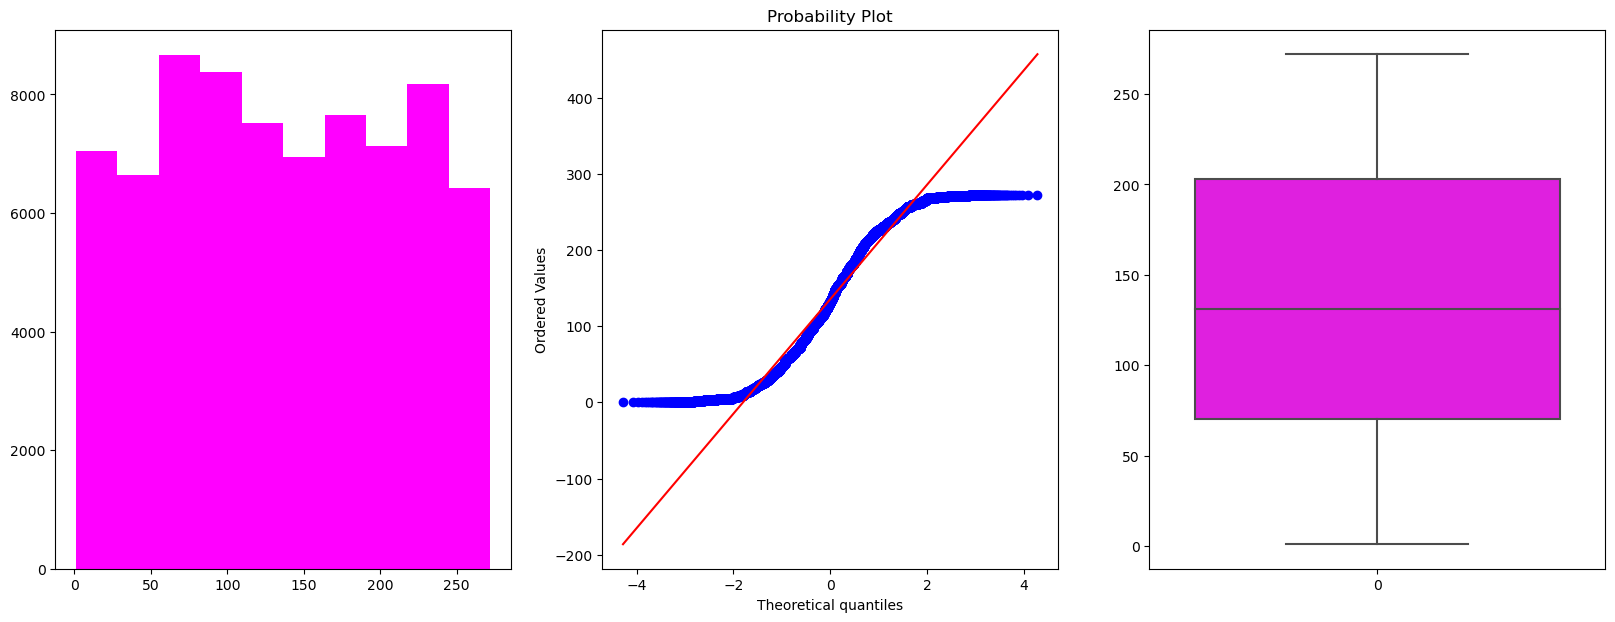

....................................................................................................
Distribution plots for the feature LYLTY_CARD_NBR are shown below 


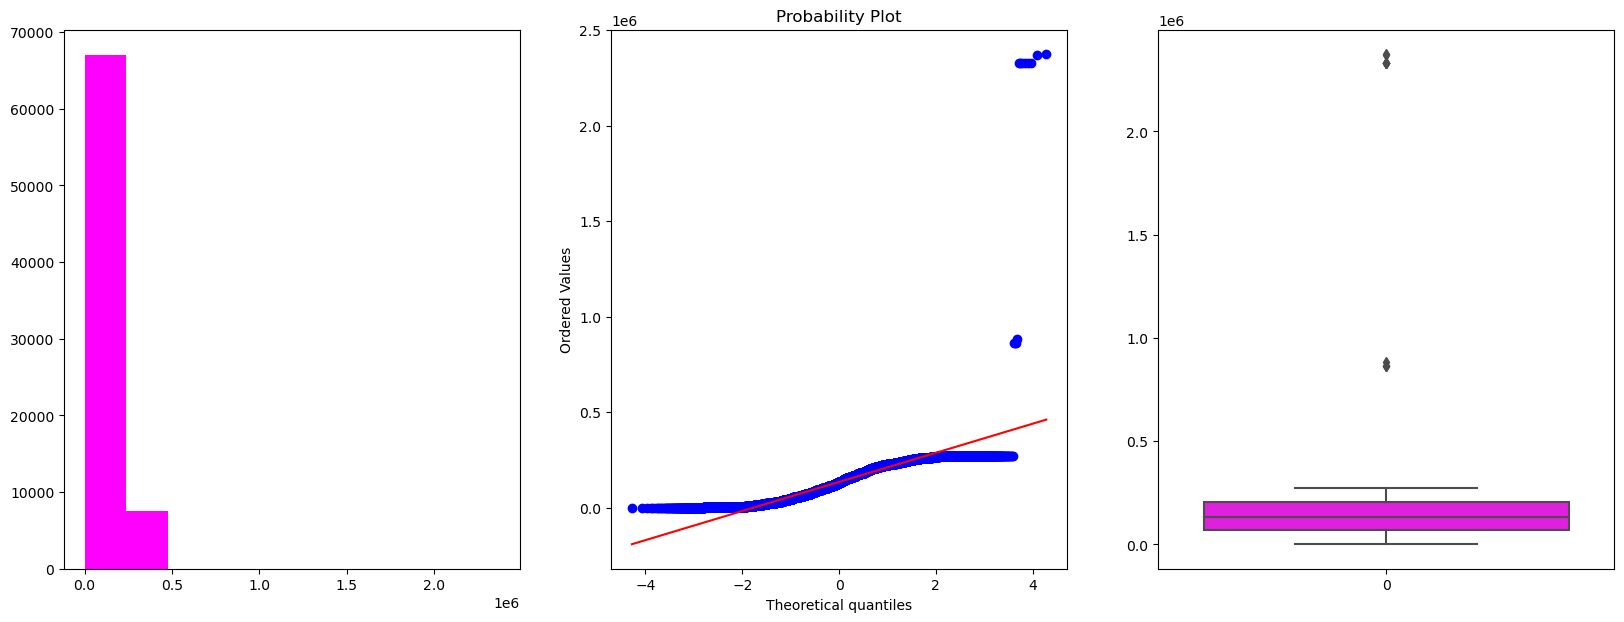

....................................................................................................
Distribution plots for the feature TXN_ID are shown below 


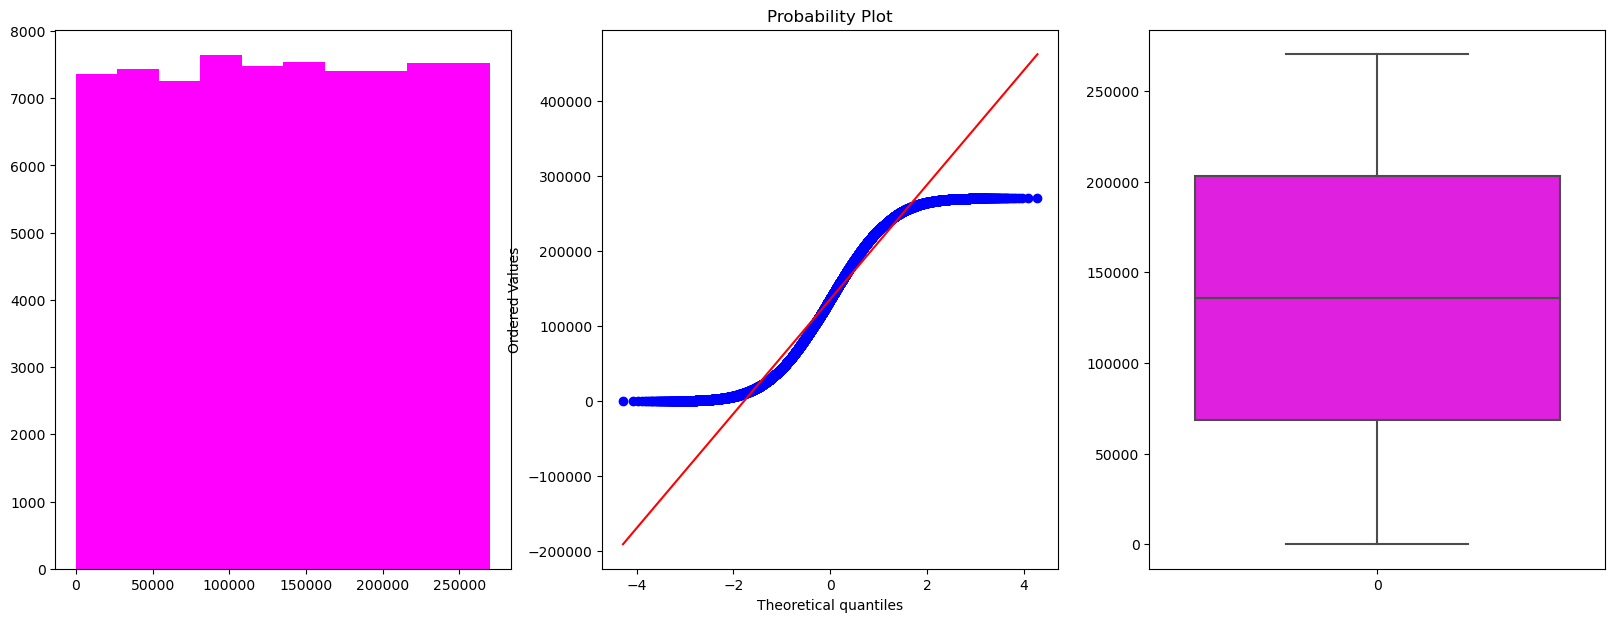

....................................................................................................
Distribution plots for the feature PROD_NBR are shown below 


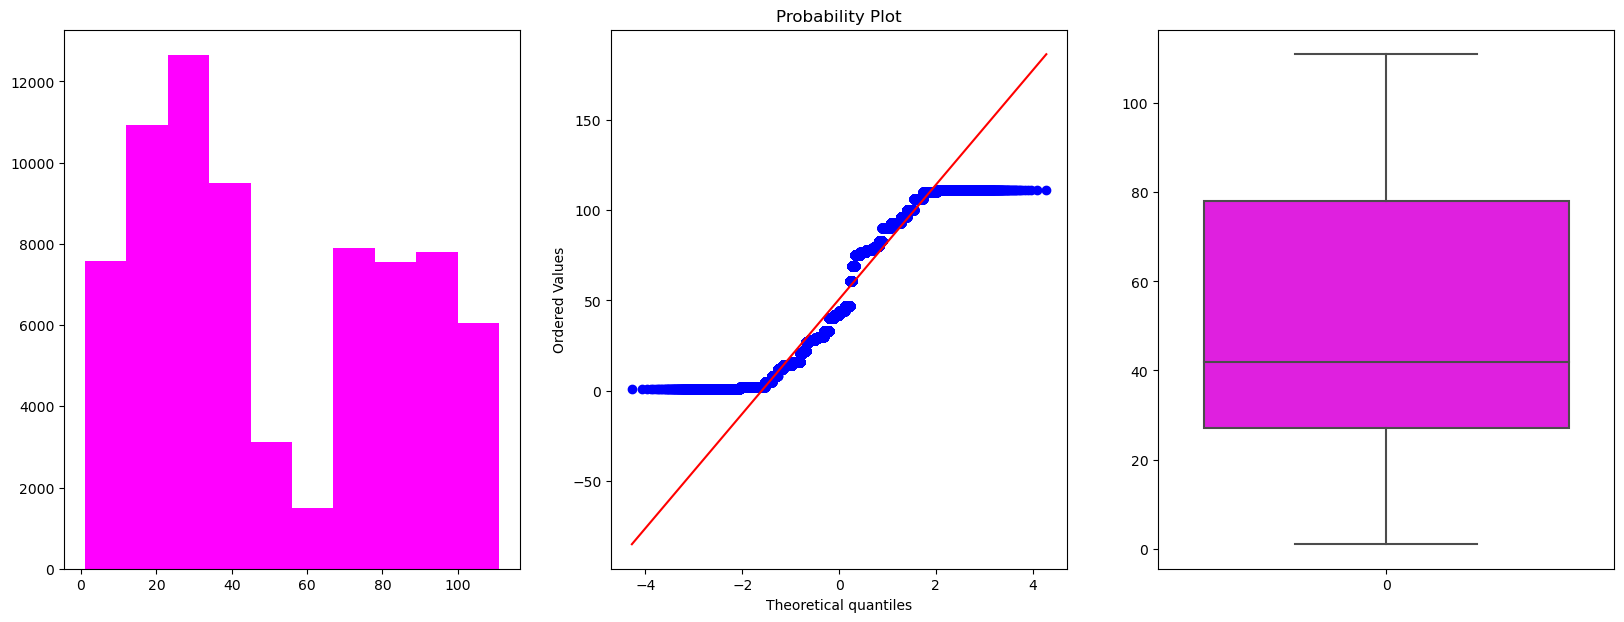

....................................................................................................
Distribution plots for the feature PROD_QTY are shown below 


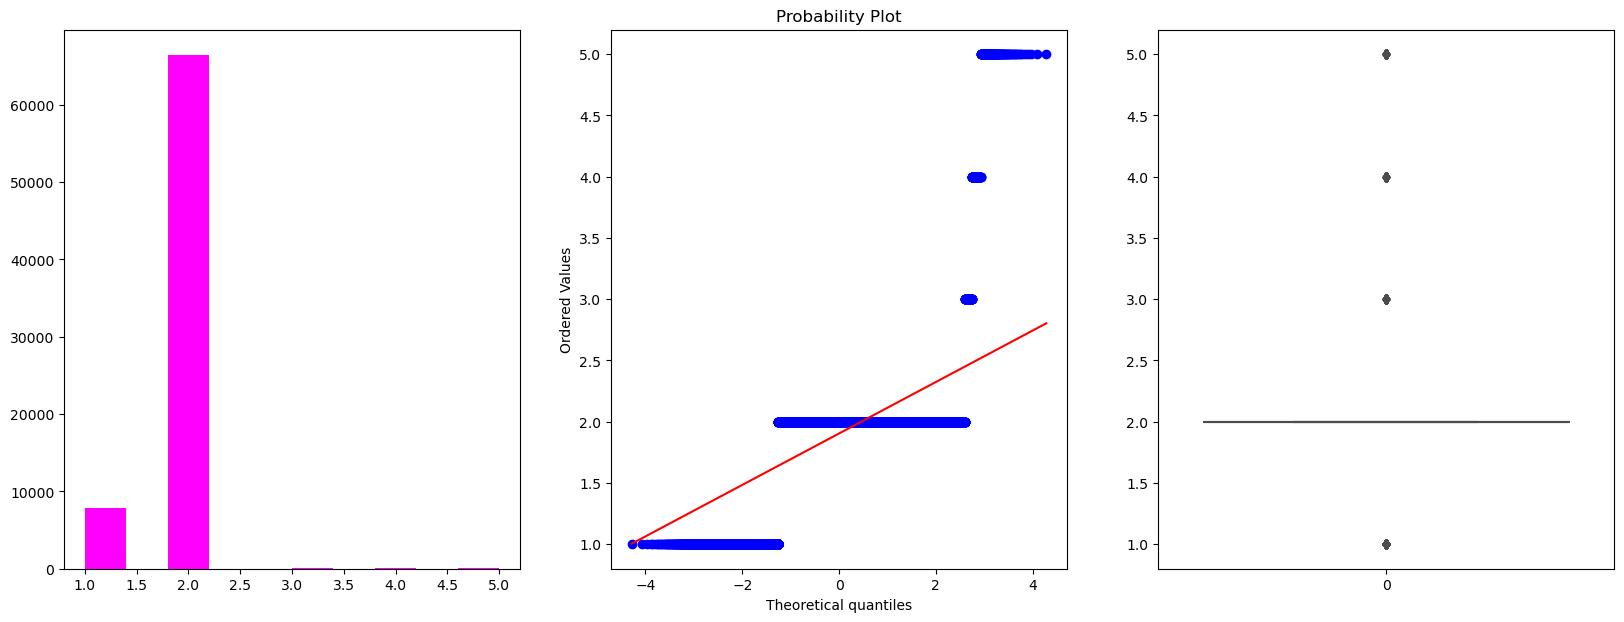

....................................................................................................
Distribution plots for the feature TOT_SALES are shown below 


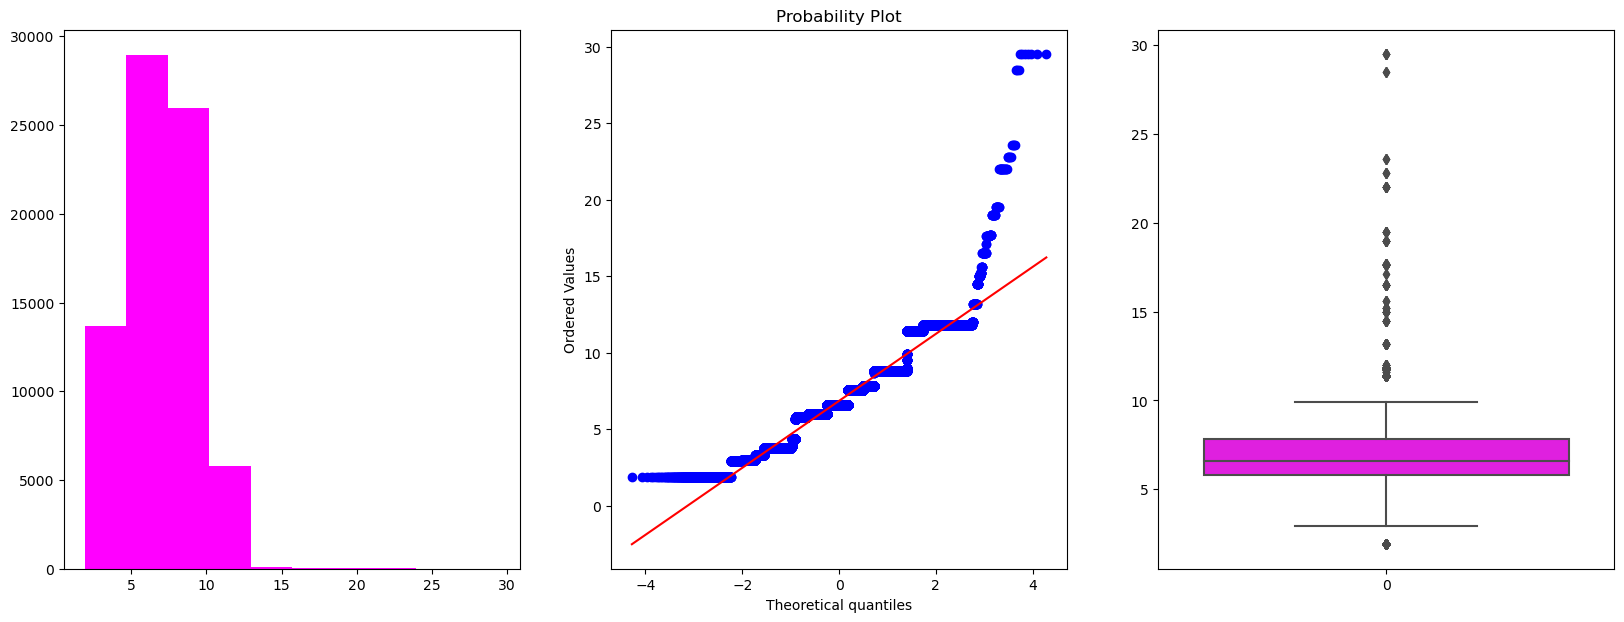

....................................................................................................


In [37]:
# function that plots the distribution
def draw_plots(df, col):
    
    plt.figure(figsize=(20, 7))
    plt.subplot(1, 3, 1)
    plt.hist(df[col], color="magenta")
    
    plt.subplot(1, 3, 2)
    stats.probplot(df[col], dist="norm", plot=plt)
    
    plt.subplot(1, 3, 3)
    sns.boxplot(df[col], color="magenta")
    
    plt.show()

for i in range(len(t_num_col)):
    
    print(f"Distribution plots for the feature {t_num_col[i]} are shown below ")
    
    draw_plots(transaction_df, t_num_col[i])
    
    print("."*100)

We can clearly see that there are outliers in the dataset

**Handling outliers**

In [38]:
upper_limit = []
lower_limit = []
for i in t_num_col:
    upper_limit.append(transaction_df[i].mean() + (transaction_df[i].std())*4)
    lower_limit.append(transaction_df[i].mean() - (transaction_df[i].std())*4)

In [41]:
upper_limit

[442.46988395831573,
 456923.16082018544,
 447376.7578985613,
 181.8213551115708,
 3.2789654229248266,
 15.887155250193294]

In [42]:
lower_limit

[-171.55458289890845,
 -185104.2052080089,
 -176309.59700275873,
 -80.51927652768987,
 0.5295634760962273,
 -2.1661333915370005]

In [43]:
j = 0
for i in range(len(t_num_col)):
    
    temp = transaction_df.loc[(transaction_df[t_num_col[i]]>upper_limit[j]) | (transaction_df[t_num_col[i]]<lower_limit[j])]
    j += 1

In [44]:
# Outliers
temp

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
100,1899-12-30 00:00:00.000043605,130,130108,134125,2,Cobs Popd Sour Crm Chives Chips g,5,19.0
102,1899-12-30 00:00:00.000043600,133,133250,137666,30,Doritos Corn Chips Cheese Supreme g,4,17.6
165,1899-12-30 00:00:00.000043602,222,222209,222693,40,Thins Chips Seasonedchicken g,5,16.5
5064,1899-12-30 00:00:00.000043601,26,26185,23086,93,Doritos Corn Chip Southern Chicken g,5,19.5
5156,1899-12-30 00:00:00.000043604,81,81035,79885,2,Cobs Popd Sour Crm Chives Chips g,5,19.0
...,...,...,...,...,...,...,...,...
237880,1899-12-30 00:00:00.000043330,60,60321,57513,14,Smiths Crnkle Chip Orgnl Big Bag g,3,17.7
238264,1899-12-30 00:00:00.000043329,197,197279,197208,30,Doritos Corn Chips Cheese Supreme g,4,17.6
238397,1899-12-30 00:00:00.000043603,238,238337,243243,28,Thins Potato Chips Hot Spicy g,5,16.5
258632,1899-12-30 00:00:00.000043602,88,88142,86924,78,Thins Chips Salt Vinegar g,5,16.5


In [48]:
te

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


In [56]:
transaction_df.groupby(["LYLTY_CARD_NBR"]).sum().sort_values(by="PROD_NBR", ascending=False)

C:\Users\Segun Lawal\AppData\Local\Temp\ipykernel_14572\2391395432.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  transaction_df.groupby(["LYLTY_CARD_NBR"]).sum().sort_values(by="PROD_NBR", ascending=False)


,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
LYLTY_CARD_NBR,,,,,
107167,963,983613,617,17,53.5
179063,1074,1077835,610,12,33.0
113080,904,927188,540,16,55.6
32060,288,255193,535,18,68.6
28020,224,197221,530,16,57.8
...,...,...,...,...,...
51395,51,47087,1,1,2.9
208069,208,206499,1,2,5.8
241025,241,244698,1,2,5.8


In [57]:
transaction_df["PROD_QTY"].value_counts()

2    66392
1     7835
5      127
3      117
4       99
Name: PROD_QTY, dtype: int64